In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist

import os
from keras.preprocessing.image import array_to_img
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Activation,Dropout,Flatten


In [2]:
#load data
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


5


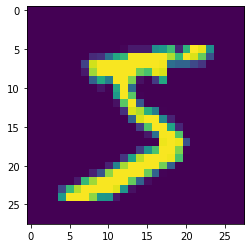

In [3]:
#Explore the  data
plt.imshow(x_train[0])
print(y_train[0])

In [4]:
# preprocess the data
LABEL=[]
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))



In [5]:
#normalize the data
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train=x_train/255.0
x_test=x_test/255.0

In [6]:
#define the model
model1=Sequential([
                   Conv2D(filters=25, kernel_size=(3, 3),input_shape=(28,28,1), activation='tanh'),
                   Flatten(),
                   Dense(units=64,activation="tanh"),
                   Dense(units=16,activation="tanh"),
                   Dense(units=10,activation='softmax')
])

In [7]:
#compile the model
model1.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 25)        250       
                                                                 
 flatten (Flatten)           (None, 16900)             0         
                                                                 
 dense (Dense)               (None, 64)                1081664   
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 1,083,124
Trainable params: 1,083,124
Non-trainable params: 0
_________________________________________________________________


In [8]:
#FIT the model
size_of_batch=32
model1.fit(x_train,y_train,batch_size=size_of_batch,epochs=30)

Epoch 1/30
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3042 - accuracy: 0.9217
Epoch 2/30
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1608 - accuracy: 0.9540
Epoch 3/30
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1210 - accuracy: 0.9653
Epoch 4/30
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1008 - accuracy: 0.9696
Epoch 5/30
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0878 - accuracy: 0.9730
Epoch 6/30
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0723 - accuracy: 0.9778
Epoch 7/30
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0621 - accuracy: 0.9810
Epoch 8/30
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0557 - accuracy: 0.9826
Epoch 9/30
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0452 - accuracy: 0.9862
Epoch 10/30
1875/1875 [==============================] - 34s 18m

In [9]:
#check the accuracy
test_loss,test_accuracy=model1.evaluate(x_test,y_test)
print(f'Test loss is {test_loss}')
print(f'Test accuracy is {test_accuracy}')

313/313 [==============================] - 2s 7ms/step - loss: 0.1682 - accuracy: 0.9603
Test loss is 0.16823142766952515
Test accuracy is 0.9603000283241272
